In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import ZebraLib as zb

def mean(array):
    mean_mi = 0
    for i in range(len(array)):
        mean_mi += array[i]
    mean_mi = mean_mi/len(array)
    return mean_mi

def incert_A(array):
    return ufloat(array.mean(), array.std(ddof=1)/np.sqrt(len(array)))

def  incert_B(array, precision):
    array_er = []
    for i in range(len(array)):
        array_er.append(ufloat(array[i], precision/np.sqrt(3)))
    return array_er

### Dados coletados e calculo do perfil de escoamento

In [66]:
#Dados coletados
D_val = np.array([78.25, 78.30, 78, 78.5, 78, 78.05, 77.90, 78.15, 78.25])
V_bar = np.array([27.85, 28.68, 28.62, 27.65, 28.82, 27.36, 28.78, 26.48])

h1 = np.array([14, 14.5, 14.9, 15.4, 16, 16.1, 15.5, 15.2, 14.8, 14.1, 13.8])/100
h2 = np.array([7.1, 6.7, 6.2, 5.8, 5.4, 5.1, 5.5, 5.9, 6.7, 7.1, 7.7])/100

#Equação do tubo de pitot
v = np.sqrt((2*1000*9.81*(h1-h2))/1.2)
y = np.array([-36.5, -33, -28, -22.5, -13, 0, 12, 22, 28, 33, 36.5])/1000
#y = np.array([0, 12.5, 22.25, 28, 33, 36.5])/1000

### Cálculando velocidade média pela integral  

In [67]:
h1p = np.array([13.9, 14.3, 14.85, 15.3, 16])/100
h2p = np.array([7.4, 6.9, 6.45, 5.85, 5.45])/100

vp = np.sqrt((2*1000*9.81*(h1p-h2p))/1.2)
yp = np.array([0, 12.5, 22.25, 28, 33, 36.5])/1000

In [68]:
#Velocidade média pelo perfil de escoamento
Q = 2*np.pi*zb.integral(vp, yp*yp.max(), 0, 36)
vp = Q/(np.pi*yp.max()**2)
vp

31.22134077135164

In [69]:
#Dados calculados
D = ufloat(D_val.mean(), D_val.std(ddof=1)/np.sqrt(len(D_val)))
V_med = ufloat(V_bar.mean(), V_bar.std(ddof=1)/np.sqrt(len(V_bar)))
delta_h = h1-h2

In [70]:
mi = 17.2e-6
rho = 1.2
D = 78.25/1000

#Numero de Renolds - Velocidade anemometro
Re = (((V_med)*D*rho)/(mi))
Re

153024.2441860465+/-1628.895173746246

In [71]:
#Numero de Renolds - Velocidade perfil de escoamento
Re = (((vp)*D*rho)/(mi))
Re

170446.73828080922

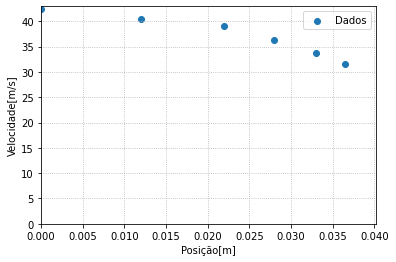

In [72]:
fig, ax = plt.subplots()
ax.set(xlabel='Posição[m]', ylabel='Velocidade[m/s]')

ax.scatter(y, v, label='Dados')

ax.grid(ls='dotted')
ax.legend()
ax.set_ylim(0)
ax.set_xlim(0)

fig.savefig('velc_x_y.pdf', bbox_inches='tight')